# Homework 02

### Team:
- Ariana Villegas 
- John-Ryan Romo

### Import libraries

In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.stats import norm

In [17]:
from src.armedBandit import ArmedBandit
from src.policy import *

In [18]:
tf.random.set_seed(2022)

In [19]:
def testPolicy(Policy, n, t, init, scenarios):
    plt.clf()
    for eps in scenarios:
        policy = Policy(eps)
        bandit = ArmedBandit(n, t, init, policy)
        bandit.simulate()

        r = bandit.get_reward_steps()
        plt.plot(range(t), r, label=eps)

    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel('Average Reward')
    plt.title('Average Reward with {} Policy Init {}'.format(policy.get_name(), init))
    plt.show()   

### Question 1

**(a)** Initialize all $Q_t(a)=0$ for $a=1,\cdots, N$. Simulate an $\epsilon$-Greedy agent:
$$
    \begin{eqnarray}
    A_t &=& \left\{
    \begin{array}{rl}
    \arg \max_{1\leq a \leq N}{Q_t(a)} & \text{with probability $1-\epsilon$}\\
    {\cal U}\left(\left\{ 1, \cdots, N\right\} \right) & \text{with probability $\epsilon$}
    \end{array}\right.  \label{eq:eps_greedy01}
    \end{eqnarray}
$$
where $0\leq \epsilon \leq 1$ and ${\cal U}\left( S \right)$ denotes the uniform distribution over the set $S$. Plot the average reward $\bar{R}_t$ for $t=1, \cdots, T$ on the same figure for the following: $\epsilon=0$, $\epsilon=0.1$, $\epsilon=0.25$. Remember to add a legend for the three curves. Also on a separate single figure, plot  the fraction of times the optimal action was selected for $t=1, \cdots, T$ for $\epsilon=0$, $\epsilon=0.1$, $\epsilon=0.25$.

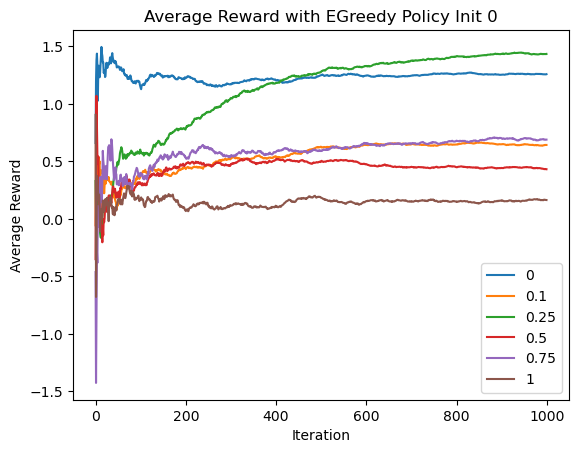

In [20]:
n = 10
t = 1000
init = 0
epsilon = [0, 0.1, 0.25, 0.5, 0.75, 1]

testPolicy(EGreedy, n, t, init, epsilon)

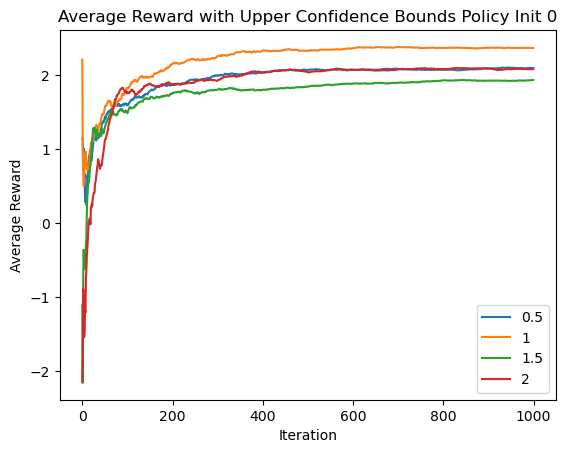

In [21]:
confidence = [0.5, 1, 1.5, 2]
testPolicy(UCB, n, t, init, confidence)

**(b)** Repeat Q1(a), with the Initialization that all Qt(a) = 5 for a = 1,··· ,N.

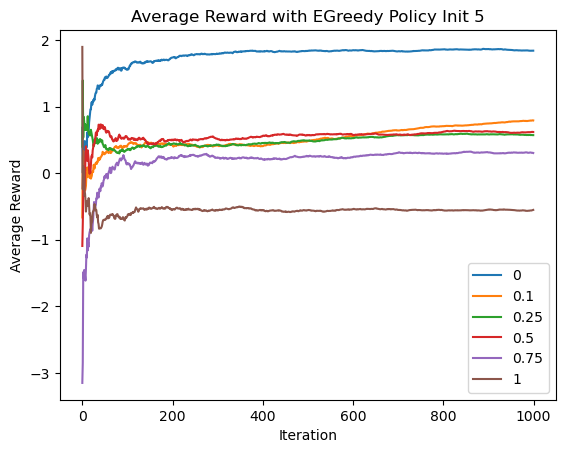

In [22]:
init = 5

testPolicy(EGreedy, n, t, init, epsilon)  

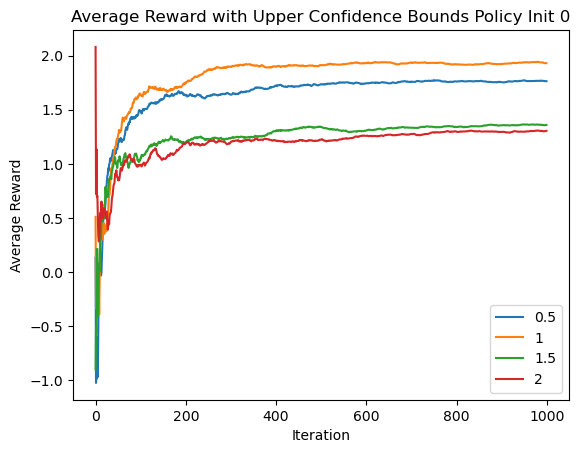

In [32]:
testPolicy(UCB, n, t, init, confidence)

**C** Now suppose that an agent select its actions according to the action probabilities πt(a):
At ∼ πt(a)
1 ©S. K. Jayaweera
 Nt(a) k=1
  
ECE595: ST: Deep Reinforcement Learning where
eHt (a) πt(a) ≜ Pr(At =a) = 􏰕ceHt(c)
ECE@UNM
  is the Gibbs/Boltzman/soft-max distribution. At each time instant t, after executing action At and receiving reward Rt, the agent updates Ht(a)’s according the following stochastic gradient ascent (SGA) algorithm:

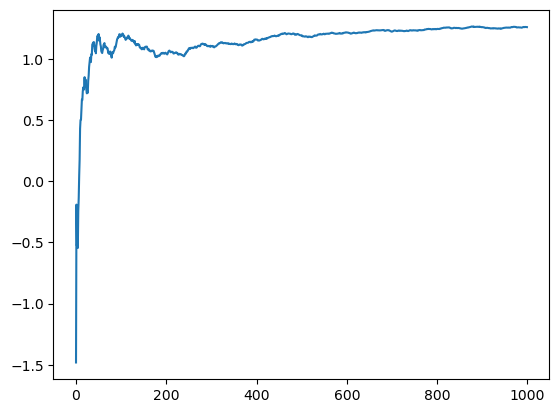

In [23]:
r = bandit.get_reward_steps()
plt.clf()
plt.plot(range(t), r)
plt.show()

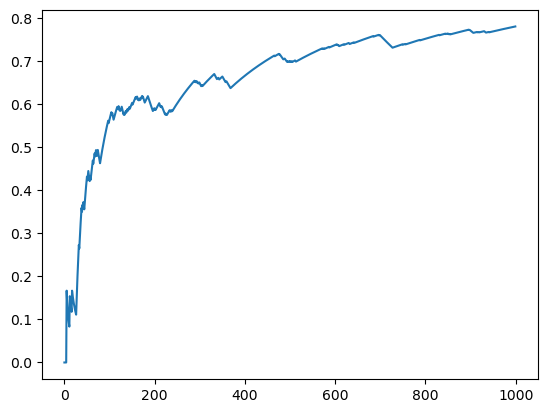

In [24]:
p = bandit.get_best_fraction()
plt.clf()
plt.plot(range(t), p)
plt.show()

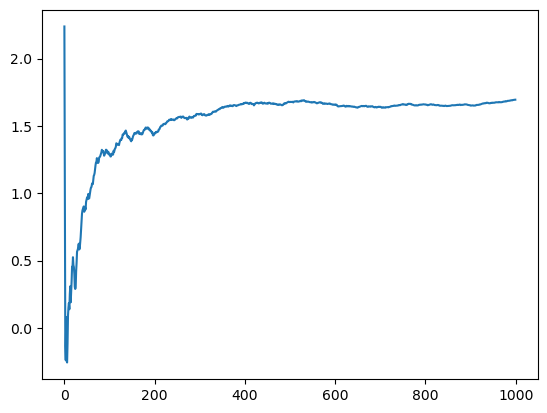

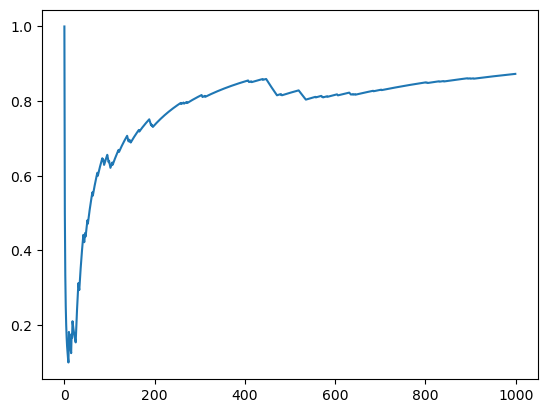

In [25]:
init = 0
ucb = UCB()
bandit = ArmedBandit(n, t, init, ucb)
bandit.simulate()

r = bandit.get_reward_steps()
plt.clf()
plt.plot(range(t), r)
plt.show()

p = bandit.get_best_fraction()
plt.clf()
plt.plot(range(t), p)
plt.show()